In [ ]:
import pandas as pd

In [ ]:
fichier=pd.read_excel("/content/ventes_regression.xls", sheet_name='VENTES.TRAIN')

In [ ]:
fichier.shape

(18, 9)

In [ ]:
fichier

,MT,RG,PRIX,BR,INV,PUB,FV,TPUB,VENTES
0,369,118,59,9,17,89,177,225,5439
1,476,138,71,18,4,63,279,206,5149
2,432,152,73,16,-50,16,245,309,4704
3,418,135,79,35,142,74,270,83,5036
4,383,104,60,21,-45,32,201,298,4110
5,554,138,81,20,42,93,324,161,6180
6,320,147,66,15,10,48,154,305,4888
7,268,129,57,29,89,51,166,263,4290
8,359,106,69,27,71,74,196,414,5397
9,461,132,82,27,-18,91,267,170,5272


In [ ]:
fich=fichier.dropna()
print(fich.shape)#return shape

(18, 9)


In [ ]:
import sklearn.preprocessing as skp
scaler=skp.StandardScaler()
scaler.fit(fich)#normalisation
X=scaler.fit_transform(fich)#return the new values of norm X from table matrice

In [ ]:
X[0]#show first row

array([-0.46782873, -1.09636999, -1.20581546, -1.4253829 , -0.29394242,
        1.23175734, -0.99148107, -0.27955386,  0.64703519])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)#apply the kmeans algorithm  with 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans)

KMeans(n_clusters=2, random_state=0)


In [ ]:
kmeans.cluster_centers_#clusters centrer coord

array([[ 1.12520264, -0.05145419,  1.09028823,  0.73428816,  0.33033529,
         0.81094344,  1.26168447, -0.44940937,  0.93905992],
       [-0.56260132,  0.02572709, -0.54514412, -0.36714408, -0.16516764,
        -0.40547172, -0.63084224,  0.22470468, -0.46952996]])

In [ ]:
kmeans.labels_# Access the cluster labels assigned by KMeans to each data point


array([1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int32)

In [ ]:
import numpy as np
#ser1=pd.Series([0,0,0.1,2.2,2.2,2.5,5.1,1.0,4.1])
#print(ser1.shape)
ser2=np.array([0,0,0.1,2.2,2.2,2.5,5.1,1.0,4.1])
print(ser2.shape)
ser1=np.reshape(ser2,(1,9))
print(ser1.shape)

(9,)
(1, 9)


In [ ]:
kmeans.predict(ser1)

array([0], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

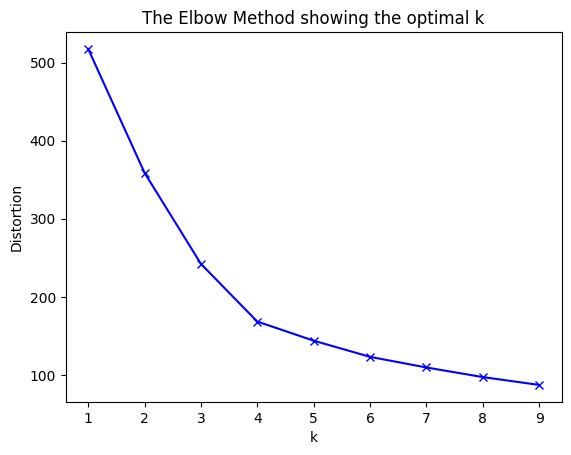

In [ ]:
# la méthode elbow qui calcule intra plus on minimise plus on optimise: on retient le premier coucude
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(fich)
    kmeanModel.fit(fich)
    distortions.append(sum(np.min(cdist(fich, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / fich.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(fich)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


on retient le k =4 car c'est la valeur optimale

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2, silhouette score is 0.4431951306756544)
For n_clusters = 3, silhouette score is 0.4791242918017139)
For n_clusters = 4, silhouette score is 0.5181298386080173)
For n_clusters = 5, silhouette score is 0.488384482678256)
For n_clusters = 6, silhouette score is 0.4544733956303238)
For n_clusters = 7, silhouette score is 0.39317424607534457)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8, silhouette score is 0.31238625487225535)
For n_clusters = 9, silhouette score is 0.274454667908442)


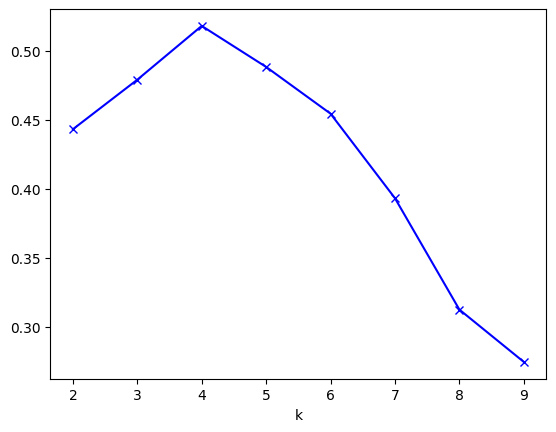

In [ ]:
# l'algorithme de silouette permet de retrouver la valeur maximale qui correspond à notre k optimale: la distance moyenne d'un point
# par rapports aux points existant dans un meme cluster-->a(i)|| b(i) la distance de ce points par rappport aux autres points des autres clusters
# s(i)=(b(i)-a(i))/max(a(i)-(b(i)))----->max(moyenne(s(i)))
from sklearn.metrics import silhouette_score
L=[]
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(fich)
    centers = clusterer.cluster_centers_

    score = silhouette_score(fich, preds)
    L.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
plt.plot(range(2,10),L, 'bx-')
plt.xlabel('k')
plt.show()

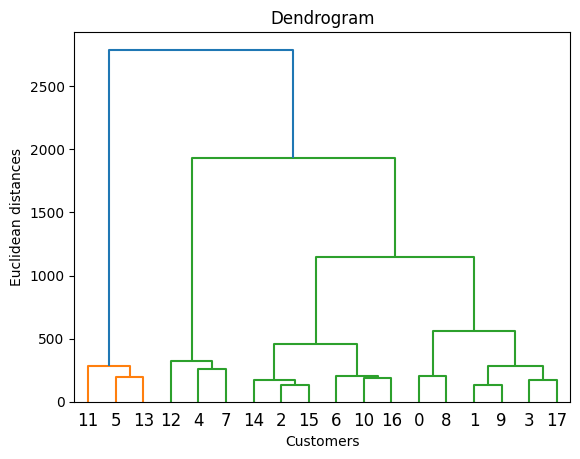

In [ ]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(fich, method  = "ward"))
#groupes_cah = sch.fcluster(dendrogram,t=3,criterion='distance')
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

L'axe des x comprend les clients et l'axe des y la distance euclidienne entre les clusters. Comment déterminer le nombre optimal de clusters à partir de ce diagramme? Nous recherchons la plus grande distance que nous pouvons avoir verticalement tout en minimisant la distance intra-cluster.

In [ ]:
y_hc=hc.fit_predict(fich)
print(y_hc)

[0 0 1 0 2 3 1 2 0 0 1 3 2 3 1 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
sum(np.min(cdist(fich, kmeans.cluster_centers_, 'euclidean'), axis=1)) / fich.shape[0]

168.33171868288676

In [ ]:
silhouette_list=[]
for p in range(2,10):

        clusterer = AgglomerativeClustering(n_clusters=p, linkage="ward")

        clusterer.fit(fich)
        # The higher (up to 1) the better
        s = round(silhouette_score(fich, clusterer.labels_), 4)

        silhouette_list.append(s)

[0.5533, 0.5356, 0.5181, 0.4884, 0.4545, 0.3932, 0.3124, 0.2745]


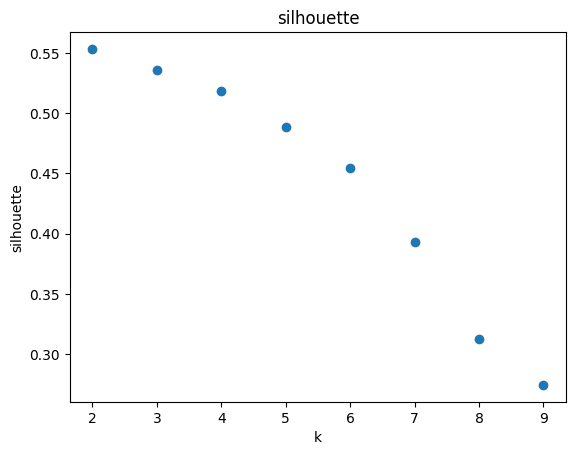

In [ ]:
print(silhouette_list)
plt.scatter([2,3,4,5,6,7,8,9],silhouette_list)
plt.title('silhouette')
plt.xlabel('k')
plt.ylabel('silhouette')
plt.show()

vous pouvez remarquer que le meilleur nombre est bien égale à 2 parce qu'on a la valeur maximale de la silhouette pour le k =2

In [ ]:
pd.crosstab(y_hc,kmeans.labels_,margins=True)

col_0,0,1,2,3,All
row_0,,,,,
0,0,0,0,6,6
1,0,0,6,0,6
2,3,0,0,0,3
3,0,3,0,0,3
All,3,3,6,6,18
